# Example: how `pybreathe` works on dummy files?

Import *BreathingFlow* object and *flow_merger* function from pybreathe &#8628;

In [1]:
from pybreathe import BreathingFlow, flow_merger

Instantiation of an object of type **BreathingFlow** with example data &#8628;

In [2]:
example_01 = BreathingFlow.load_breathing_like_signal_01()

The breathing-like signal 01 comes from the 'rsp_simulate' function of the 'NeuroKit2' package.
The complete API used is:
    ->  nk.rsp_simulate(
            duration=60,
            sampling_rate=250,
            respiratory_rate=15,
            method='breathmetrics',
            noise=0.01
        )
For more information, please visit: https://neuropsychology.github.io/NeuroKit/
The 'breathmetrics' generation method is described in Noto et al., 2018 (https://github.com/zelanolab/breathmetrics)


Call the **plot()** method: simple plot of the loaded air flow &#8628;

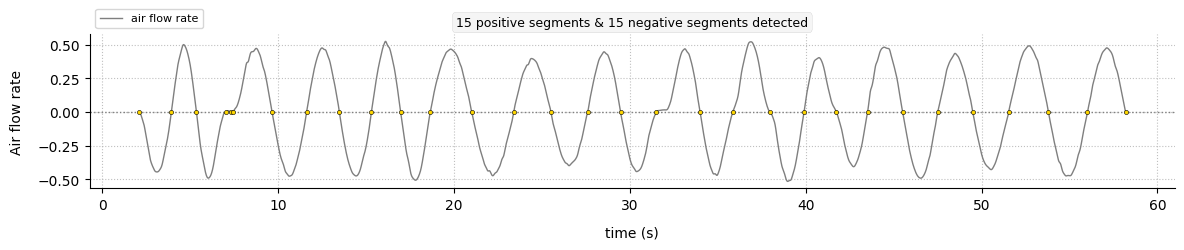

In [3]:
example_01.plot()

Call the **plot()** method with the optional argument **show_segments** set to **True**: plot the air flow by distinguishing between the positive and negative segments &#8628;

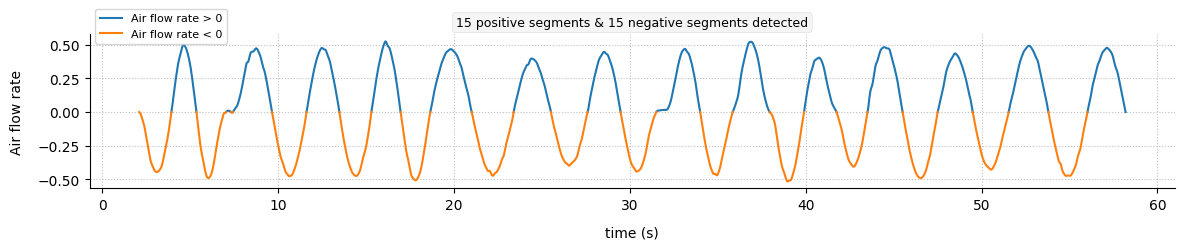

In [4]:
example_01.plot(show_segments=True)

Call the **plot()** method with the optional argument **show_auc** set to **True**: plot the air flow by distinguishing between the positive and negative AUC (Area Under the Curve).  
Yellow dots represent the points at which the flow crosses the x-axis.  
These are the $x_{0}$ such that $flow(x_0) = 0$ &#8628;

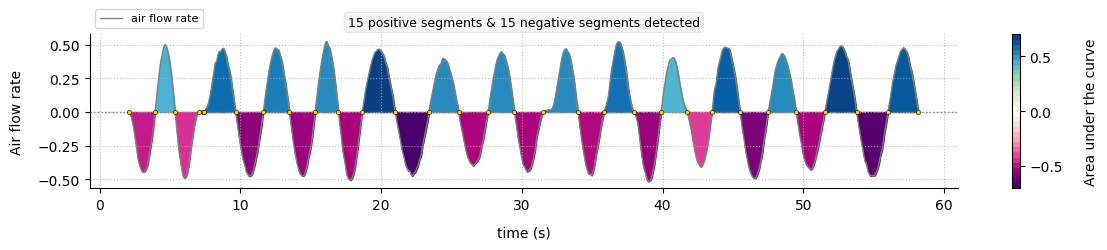

In [5]:
example_01.plot(show_auc=True)

For each instantiated *BreathingFlow* object, six features can be extracted:
- inspiratory time (duration of the positive or negative segments, depending on the orientation of the signal; i.e., inhalation below or above the y=0 axis)
- expiratory time (duration of the positive or negative segments, depending on the orientation of the signal; i.e., inhalation below or above the y=0 axis)
- inhaled volume (area of the positive or negative segments, depending on the orientation of the signal; i.e., inhalation below or above the y=0 axis)
- exhaled volume (area of the positive or negative segments, depending on the orientation of the signal; i.e., inhalation below or above the y=0 axis)
- breathing frequency
- minute ventilation (product of inhaled/exhaled volume and frequency)

To avoid ambiguity about the orientation of the signal (i.e., whether inhalation is below or above the y=0 axis), the methods have been named according to whether the segments are positive or negative.  
It is then up to the **user** to decide whether the inhalation corresponds to the positive or negative parts, and the same applies to the exhalation.  
For example, there is no method as such for calculating inspiratory time, but there is a method for calculating the duration of positive parts.

Call the **plot_distribution()** method: plot the distribution of durations and areas of positive and negative segments &#8628;

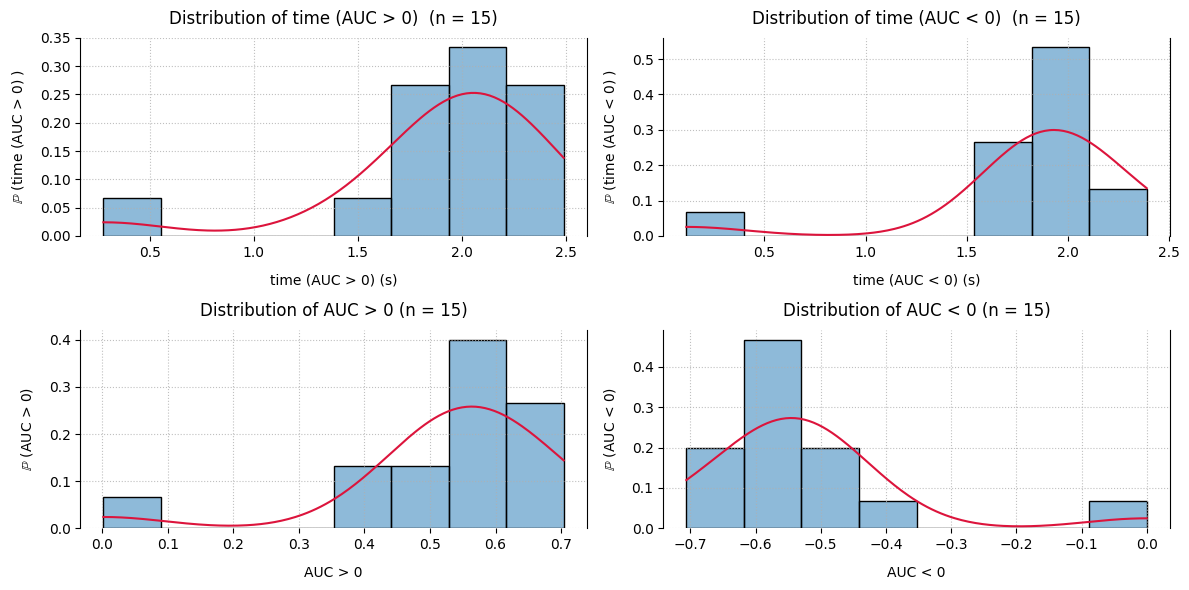

In [6]:
example_01.plot_distribution()

To visualise the exact number of segments rather than the probability of occurrence, we can call the method with the optional argument: **stat="count"** &#8628;

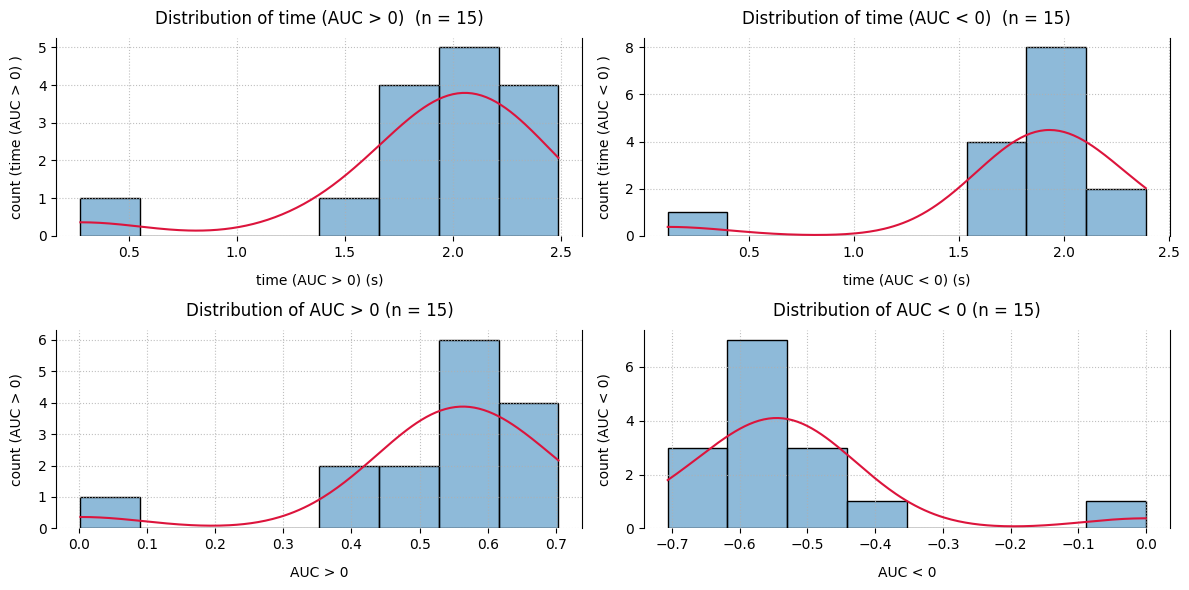

In [7]:
example_01.plot_distribution(stat="count")

We can see that a single positive segment (out of the 15 detected) has a duration of around 0.5. However, five positive segments (out of the 15 detected) have a duration of around 2 (panel top left).

Then, to get the mean duration of positive segments, we can call the **get_positive_time()** method &#8628;

In [8]:
example_01.get_positive_time()

mean = 1.91 ± 0.509 (n = 15).


(1.91, 0.509, 15)

In this case, by comparing the distribution with the plot of the breathing signal (cell #5), we see that there is a kind of respiratory artifact (~ outlier) which cannot be considered as a true positive segment (around 7 seconds in the plot). To avoid considering it when calculating the average, we can pass the **lower_threshold** argument to exclude all values below the defined threshold &#8628;

In [9]:
example_01.get_positive_time(lower_threshold=1.0)

mean = 2.02 ± 0.271 (n = 14).


(2.02, 0.271, 14)

In this case, we calculated the average over the 14 “true” positive segments. Once we are sure of the value obtained, we can 'set it in memory' with the argument **save=True** &#8628;

In [10]:
example_01.get_positive_time(lower_threshold=1.0, save=True)

mean = 2.02 ± 0.271 (n = 14).


(2.02, 0.271, 14)

We can also pass the **upper_threshold** argument to exclude all values above the defined threshold &#8628;

In [11]:
example_01.get_positive_time(upper_threshold=2.3) # Do not save here

mean = 1.83 ± 0.501 (n = 13).


(1.83, 0.501, 13)

There is also an optional argument for getting all the values of positive segments instead of the mean: **return_mean=False** &#8628;

In [12]:
example_01.get_positive_time(return_mean=False)

(1.42,
 0.276,
 2.22,
 1.87,
 1.66,
 2.35,
 2.12,
 1.87,
 2.49,
 2.1,
 1.84,
 1.99,
 1.99,
 2.26,
 2.16)

We can see each individual segment value. Each segment can then be highlighted on the signal plot (**plot()** method) using the optional argument: **highlight_time=(which_time_we_want_to_highlight, )** &#8628;

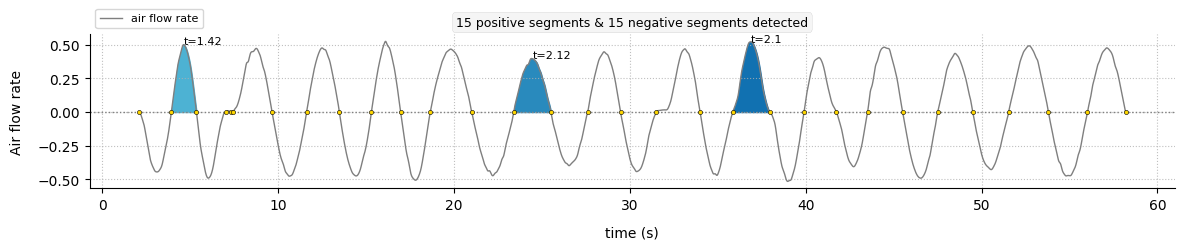

In [13]:
example_01.plot(highlight_time=(1.42, 2.12, 2.1))

We can also highlight the value we have removed (the one below the threshold) &#8628;

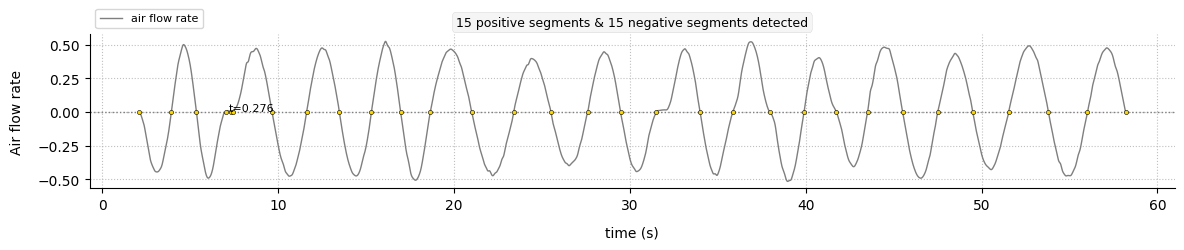

In [14]:
example_01.plot(highlight_time=(0.276, ))

The entire analysis path described above is valid for each of the other 3 methods:
- get_negative_time()
- get_positive_auc()
- get_negative_auc()

We strongly recommend using the distribution of values (**plot_distribution()** method) as a basis for setting thresholds.

### get_negative_time() method

In [15]:
example_01.get_negative_time()

mean = 1.83 ± 0.495 (n = 15).


(1.83, 0.495, 15)

In [16]:
example_01.get_negative_time(lower_threshold=1.0)

mean = 1.95 ± 0.192 (n = 14).


(1.95, 0.192, 14)

In [17]:
example_01.get_negative_time(lower_threshold=1.0, save=True)

mean = 1.95 ± 0.192 (n = 14).


(1.95, 0.192, 14)

In [18]:
example_01.get_negative_time(return_mean=False)

(1.83,
 1.69,
 0.114,
 1.96,
 1.82,
 1.69,
 2.39,
 2.09,
 2.04,
 1.85,
 1.95,
 1.77,
 1.99,
 2.04,
 2.22)

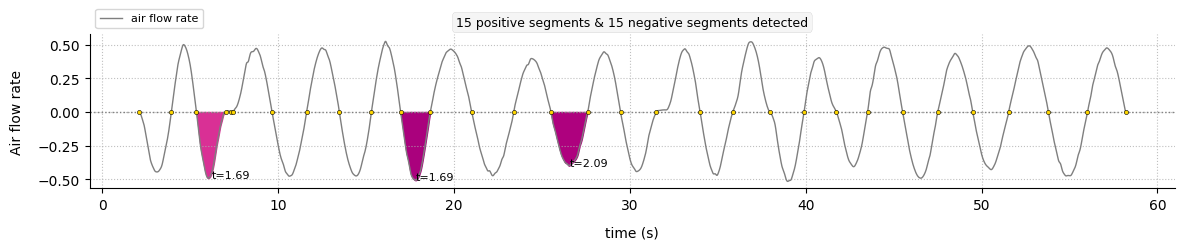

In [19]:
example_01.plot(highlight_time=(1.69, 2.09))

### get_positive_auc() method

In [20]:
example_01.get_positive_auc()

mean = 0.529 ± 0.16 (n = 15).


(0.529, 0.16, 15)

In [21]:
example_01.get_positive_auc(lower_threshold=0.3)

mean = 0.567 ± 0.0789 (n = 14).


(0.567, 0.0789, 14)

In [22]:
example_01.get_positive_auc(lower_threshold=0.3, save=True)

mean = 0.567 ± 0.0789 (n = 14).


(0.567, 0.0789, 14)

In [23]:
example_01.get_positive_auc(return_mean=False)

(0.44,
 0.00179,
 0.599,
 0.56,
 0.532,
 0.704,
 0.526,
 0.529,
 0.527,
 0.59,
 0.432,
 0.631,
 0.533,
 0.691,
 0.644)

To highlight auc, we have to pass the optional argument **highlight_auc=(which_auc_we_want_to_highlight)** &#8628;

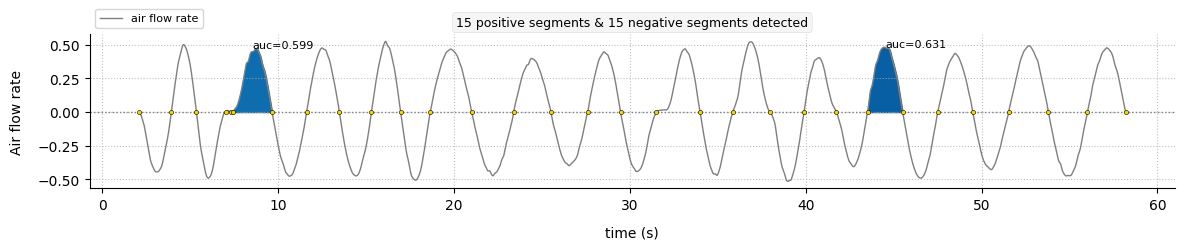

In [24]:
example_01.plot(highlight_auc=(0.599, 0.631))

We can also highlight the value we have removed (the one below the threshold) &#8628;

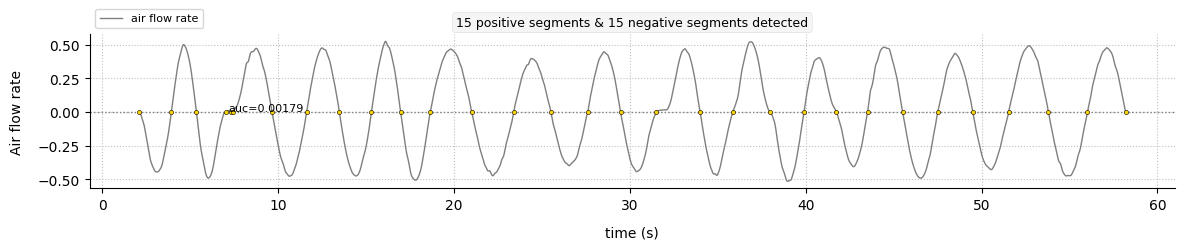

In [25]:
example_01.plot(highlight_auc=(0.00179, ))

### get_negative_auc() method

In [26]:
example_01.get_negative_auc()

mean = -0.517 ± 0.156 (n = 15).


(-0.517, 0.156, 15)

/!\ For negative areas, if we want to remove a value that is too small in absolute value (outlier), we have to pass the argument **upper_threshold** as the values are negative &#8628;

In [27]:
example_01.get_negative_auc(upper_threshold=-0.2)

mean = -0.554 ± 0.0753 (n = 14).


(-0.554, 0.0753, 14)

In [28]:
example_01.get_negative_auc(upper_threshold=-0.2, save=True)

mean = -0.554 ± 0.0753 (n = 14).


(-0.554, 0.0753, 14)

In [29]:
example_01.get_negative_auc(return_mean=False)

(-0.486,
 -0.448,
 -0.000389,
 -0.592,
 -0.559,
 -0.537,
 -0.706,
 -0.533,
 -0.533,
 -0.518,
 -0.572,
 -0.429,
 -0.621,
 -0.543,
 -0.681)

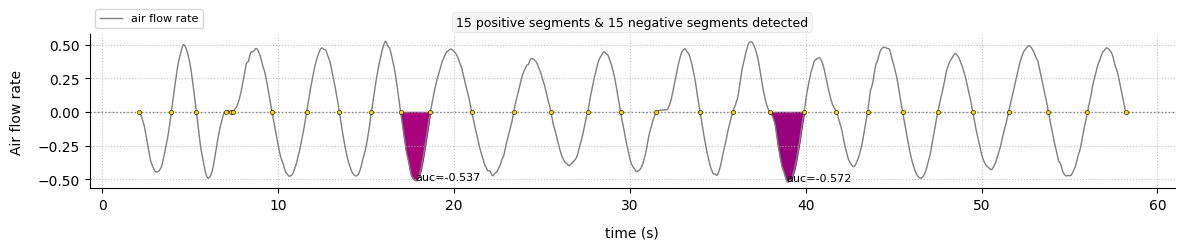

In [30]:
example_01.plot(highlight_auc=(-0.537, -0.572))

We can calculate the frequency of the signal with the **get_frequency()** method &#8628;

In [31]:
example_01.get_frequency() # Same as example_01.get_frequency(method="welch")

16.0

There are four different methods (default to 'welch') for computing frequency &#8628;

In [32]:
example_01.get_frequency(method="fft")

14.9

In [33]:
example_01.get_frequency(method="periodogram")

14.9

The last method (method="peaks") calculates the frequency according to the number of peaks or hollows. Before using it, we need to use the **test_distance()** method to detect peaks (or hollows).  
We need to specify which peaks (top = peaks; bottom = hollows) we want to consider and the distance (arbitrary number) between the peaks.  
Just choose an arbitrary distance that allows all the peaks (or hollows) to be detected correctly &#8628;

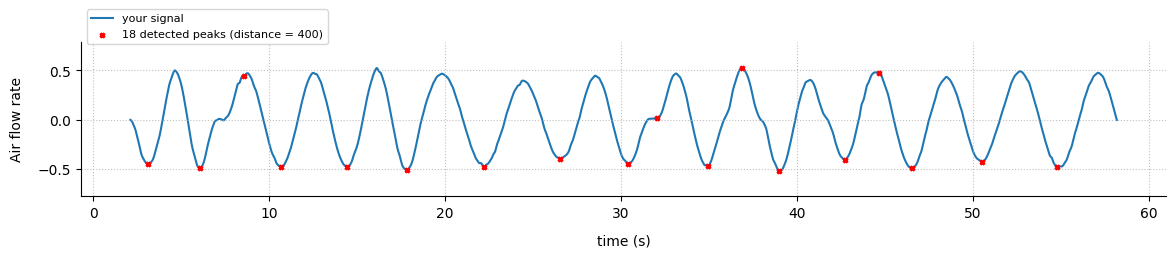

In [34]:
example_01.test_distance(which_peaks="bottom", distance=400) # False: some hollows are detected when they should not be

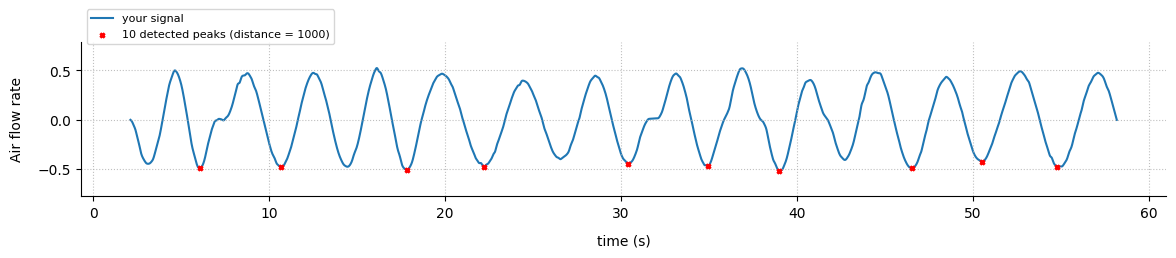

In [35]:
example_01.test_distance(which_peaks="bottom", distance=1000) # False: some hollows are not detected

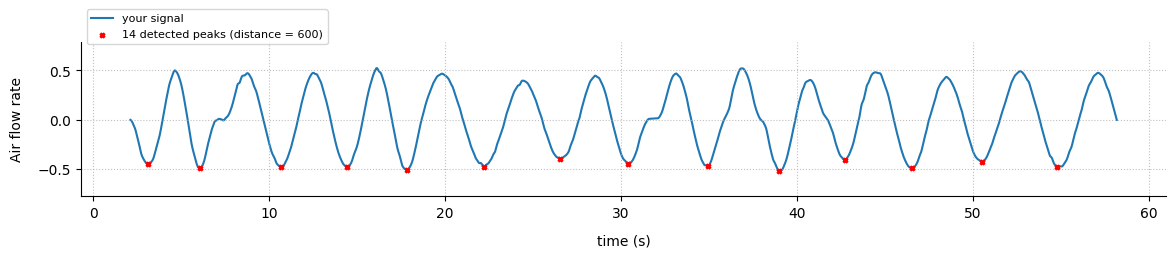

In [36]:
example_01.test_distance(which_peaks="bottom", distance=600) # True: all hollows are correctly detected

Once we have obtained the correct distance, we can save it with the argument **set_dist=True** &#8628;

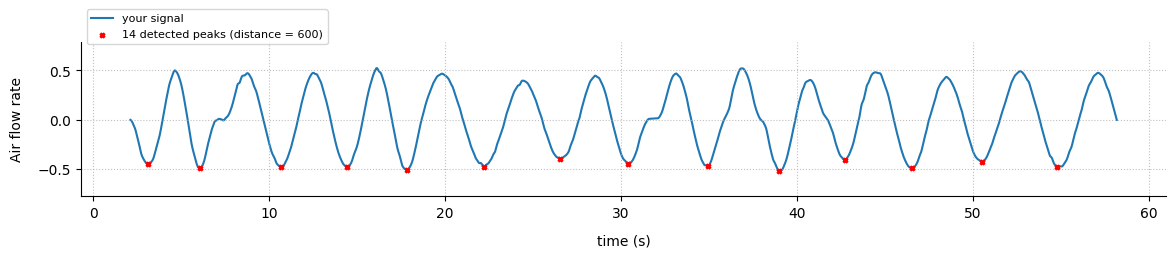

In [37]:
example_01.test_distance(which_peaks="bottom", distance=600, set_dist=True) 

We can then calculate the frequency using the 'peaks' method, specifying which peaks we want to consider &#8628;

In [38]:
example_01.get_frequency(method="peaks", which_peaks="bottom")

15.1

We can do exactly the same analysis with 'true' peaks (not hollows) &#8628;

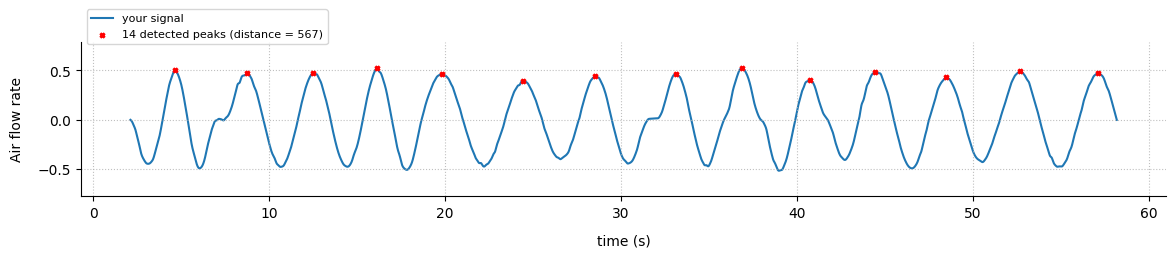

In [39]:
example_01.test_distance(which_peaks="top", distance=567, set_dist=True)

In [40]:
example_01.get_frequency(method="peaks", which_peaks="top")

14.8

We can save the frequency with the argument **save=True** &#8628;

In [41]:
example_01.get_frequency(method="peaks", which_peaks="bottom", save=True)

15.1

Finally, we can calculate (and save) the minute ventilation with &#8628;

In [42]:
example_01.get_minute_ventilation(save=True)

Minute ventilation of positive segments: 8.56.
Minute ventilation of negative segments: -8.37.


(8.56, -8.37)

Once all the features have been extracted, the complete data can be retrieved using the **get_overview()** method &#8628;

In [43]:
example_01.get_overview()

Bf (rpm)                time (AUC > 0) (s)  \
                                     mean std n cycle(s)               mean   
example_breathing-like_signal_01     15.1   -          -               2.02   

                                                   time (AUC < 0) (s)         \
                                    std n cycle(s)               mean    std   
example_breathing-like_signal_01  0.271         14               1.95  0.192   

                                            AUC value (AUC > 0)          \
                                 n cycle(s)                mean     std   
example_breathing-like_signal_01         14               0.567  0.0789   

                                            AUC value (AUC < 0)          \
                                 n cycle(s)                mean     std   
example_breathing-like_signal_01         14              -0.554  0.0753   

                                            Min. ventilation (AUC > 0)  \
                                 n cycle(s)                       mean   
example_breathing-like_signal_01         14                       8.56   

                                 Min. ventilation (AUC < 0)  
                                                       mean  
example_breathing-like_signal_01                      -8.37

This table can be saved to disk using the optional argument **output_directory**.  
Here, we have to specify only the directory where the table has to be saved &#8628;

In [44]:
example_01.get_overview(output_directory=r"\\wsl.localhost\Ubuntu\home\tcoustillet\test")

Bf (rpm)                time (AUC > 0) (s)  \
                                     mean std n cycle(s)               mean   
example_breathing-like_signal_01     15.1   -          -               2.02   

                                                   time (AUC < 0) (s)         \
                                    std n cycle(s)               mean    std   
example_breathing-like_signal_01  0.271         14               1.95  0.192   

                                            AUC value (AUC > 0)          \
                                 n cycle(s)                mean     std   
example_breathing-like_signal_01         14               0.567  0.0789   

                                            AUC value (AUC < 0)          \
                                 n cycle(s)                mean     std   
example_breathing-like_signal_01         14              -0.554  0.0753   

                                            Min. ventilation (AUC > 0)  \
                                 n cycle(s)                       mean   
example_breathing-like_signal_01         14                       8.56   

                                 Min. ventilation (AUC < 0)  
                                                       mean  
example_breathing-like_signal_01                      -8.37

## Example with the other breathing-like data

In [45]:
example_02 = BreathingFlow.load_breathing_like_signal_02()

The breathing-like signal 02 comes from the 'rsp_simulate' function of the 'NeuroKit2' package.
The complete API used is:
    ->  nk.rsp_simulate(
            duration=60,
            sampling_rate=250,
            respiratory_rate=40,
            method='breathmetrics',
            noise=0.01
        )
For more information, please visit: https://neuropsychology.github.io/NeuroKit/
The 'breathmetrics' generation method is described in Noto et al., 2018 (https://github.com/zelanolab/breathmetrics)


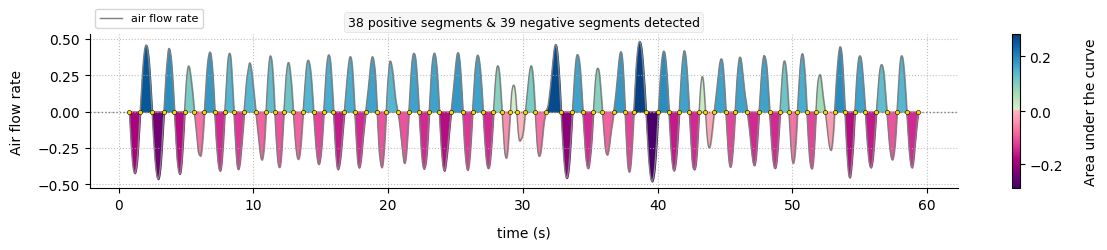

In [46]:
example_02.plot(show_auc=True)

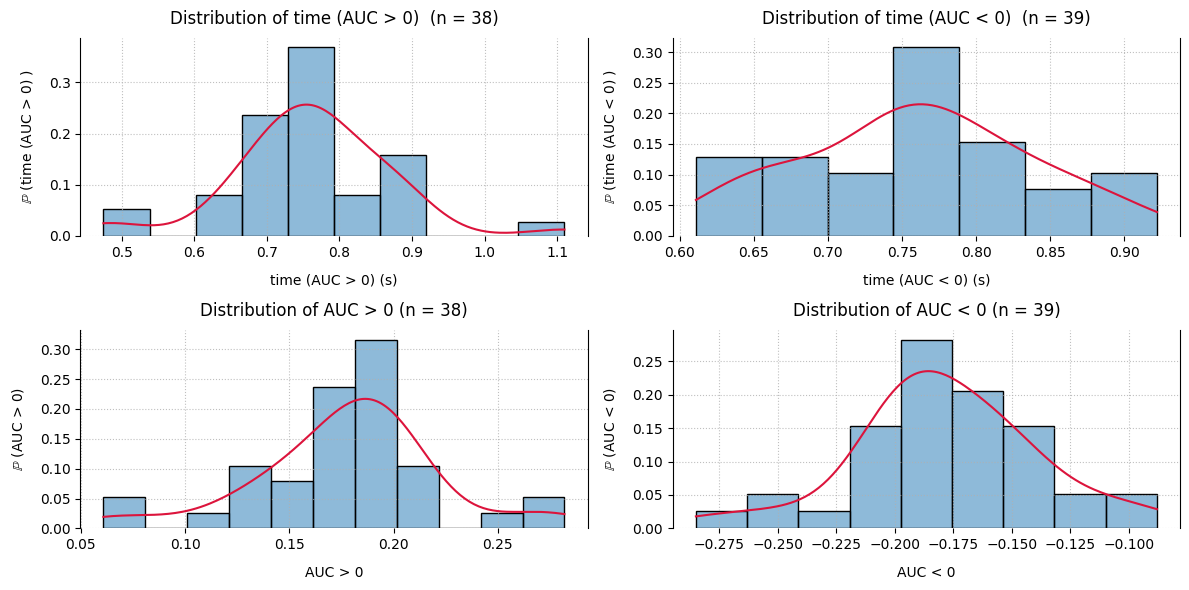

In [47]:
example_02.plot_distribution()

There appears to be no artefact (no outliers). We can extract the features without setting a threshold (neither a lower nor an upper threshold) &#8628;

In [48]:
example_02.get_positive_time(save=True)
example_02.get_negative_time(save=True)
example_02.get_positive_auc(save=True)
example_02.get_negative_auc(save=True)
print(example_02.get_frequency(save=True))
example_02.get_minute_ventilation(save=True)

mean = 0.761 ± 0.11 (n = 38).
mean = 0.759 ± 0.076 (n = 39).
mean = 0.178 ± 0.0437 (n = 38).
mean = -0.178 ± 0.039 (n = 39).
39.8
Minute ventilation of positive segments: 7.08.
Minute ventilation of negative segments: -7.08.


(7.08, -7.08)

In [49]:
example_02.get_overview()

Bf (rpm)                time (AUC > 0) (s)  \
                                     mean std n cycle(s)               mean   
example_breathing-like_signal_02     39.8   -          -              0.761   

                                                  time (AUC < 0) (s)         \
                                   std n cycle(s)               mean    std   
example_breathing-like_signal_02  0.11         38              0.759  0.076   

                                            AUC value (AUC > 0)          \
                                 n cycle(s)                mean     std   
example_breathing-like_signal_02         39               0.178  0.0437   

                                            AUC value (AUC < 0)         \
                                 n cycle(s)                mean    std   
example_breathing-like_signal_02         38              -0.178  0.039   

                                            Min. ventilation (AUC > 0)  \
                                 n cycle(s)                       mean   
example_breathing-like_signal_02         39                       7.08   

                                 Min. ventilation (AUC < 0)  
                                                       mean  
example_breathing-like_signal_02                      -7.08

We can merge the data from several signals using the **flow_merger** function.  
We need to name the table using the **table_name** argument &#8628;

In [50]:
flow_merger(example_01, example_02, table_name="examples_01_and_02")

Bf (rpm)                time (AUC > 0) (s)  \
                                     mean std n cycle(s)               mean   
example_breathing-like_signal_01     15.1   -          -               2.02   
example_breathing-like_signal_02     39.8   -          -              0.761   

                                                   time (AUC < 0) (s)         \
                                    std n cycle(s)               mean    std   
example_breathing-like_signal_01  0.271         14               1.95  0.192   
example_breathing-like_signal_02   0.11         38              0.759  0.076   

                                            AUC value (AUC > 0)          \
                                 n cycle(s)                mean     std   
example_breathing-like_signal_01         14               0.567  0.0789   
example_breathing-like_signal_02         39               0.178  0.0437   

                                            AUC value (AUC < 0)          \
                                 n cycle(s)                mean     std   
example_breathing-like_signal_01         14              -0.554  0.0753   
example_breathing-like_signal_02         38              -0.178   0.039   

                                            Min. ventilation (AUC > 0)  \
                                 n cycle(s)                       mean   
example_breathing-like_signal_01         14                       8.56   
example_breathing-like_signal_02         39                       7.08   

                                 Min. ventilation (AUC < 0)  
                                                       mean  
example_breathing-like_signal_01                      -8.37  
example_breathing-like_signal_02                      -7.08

Finally, we can also save this summary table with the **output_directory** argument  
Here, we have to specify only the directory where the table has to be saved &#8628;

In [51]:
flow_merger(example_01, example_02, table_name="examples_01_and_02", output_directory=r"\\wsl.localhost\Ubuntu\home\tcoustillet\test")

Bf (rpm)                time (AUC > 0) (s)  \
                                     mean std n cycle(s)               mean   
example_breathing-like_signal_01     15.1   -          -               2.02   
example_breathing-like_signal_02     39.8   -          -              0.761   

                                                   time (AUC < 0) (s)         \
                                    std n cycle(s)               mean    std   
example_breathing-like_signal_01  0.271         14               1.95  0.192   
example_breathing-like_signal_02   0.11         38              0.759  0.076   

                                            AUC value (AUC > 0)          \
                                 n cycle(s)                mean     std   
example_breathing-like_signal_01         14               0.567  0.0789   
example_breathing-like_signal_02         39               0.178  0.0437   

                                            AUC value (AUC < 0)          \
                                 n cycle(s)                mean     std   
example_breathing-like_signal_01         14              -0.554  0.0753   
example_breathing-like_signal_02         38              -0.178   0.039   

                                            Min. ventilation (AUC > 0)  \
                                 n cycle(s)                       mean   
example_breathing-like_signal_01         14                       8.56   
example_breathing-like_signal_02         39                       7.08   

                                 Min. ventilation (AUC < 0)  
                                                       mean  
example_breathing-like_signal_01                      -8.37  
example_breathing-like_signal_02                      -7.08

===================================

========== End of demonstration ==========

===================================

To load a personal file (e.g., from a plethysmography software), the file generally needs to be exported to be discretised.  
The command to use your data is: data = BreathingFlow.from_file(filename="\<your_personal_file>", identifier="identifier")  
Your "\<your_personal_file>" must be a two-column file with the first column representing the time.